In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [290]:
df1=pd.read_csv("DATASETS/Bengaluru_House_Data.csv")
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [291]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [292]:
df1.shape

(13320, 9)

In [293]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [294]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [295]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [296]:
df=df1.copy()

In [297]:
df2=df1.drop(['availability','society','balcony'],axis='columns')
df2

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [298]:
df2.isnull().sum() # checking for null values

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [299]:
df3=df2.dropna() # dropping null values
df3.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [300]:
df3.shape

(13246, 6)

In [301]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [302]:
df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0])) # adding a new column 'bhk'
df3.bhk.unique()

C:\Users\Valeska Dsouza\AppData\Local\Temp\ipykernel_18720\1346665376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [303]:
df3.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [304]:
df3[df3.bhk>15]

,area_type,location,size,total_sqft,bath,price,bhk
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
3379,Super built-up Area,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Super built-up Area,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,660.0,43
11559,Plot Area,1Kasavanhalli,18 Bedroom,1200,18.0,200.0,18


In [305]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [306]:
# checking for float values
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [307]:
# displaying values that are not float

df3[~df3['total_sqft'].apply(is_float)].head(12)

,area_type,location,size,total_sqft,bath,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Built-up Area,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Super built-up Area,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Built-up Area,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [308]:
# function to convert values that are represented as range, to float values
def convert_range(x):
    sqft=x.split('-')
    if len(sqft)==2:
        return (float(sqft[0])+float(sqft[1]))/2
    try:
        return float(x)
    except:
        return None

In [309]:
convert_range('2100')

2100.0

In [310]:
convert_range('3067-8156')

5611.5

In [311]:
convert_range('1000Sq. Meter')

In [312]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_range)
df4.loc[30]

area_type     Super built-up  Area
location                 Yelahanka
size                         4 BHK
total_sqft                  2475.0
bath                           4.0
price                        186.0
bhk                              4
Name: 30, dtype: object

In [313]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [314]:
len(df5.location.unique())

1304

In [315]:
df5.location=df5.location.apply(lambda x:x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [316]:
len(location_stats[location_stats<=10]) # checking for locations that are present less than 10 number of times

1052

In [317]:
loc_stats_lessthan10=location_stats[location_stats<=10]
loc_stats_lessthan10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [318]:
df5.location=df5.location.apply(lambda x:'other' if x in loc_stats_lessthan10 else x)
len(df5.location.unique())

242

In [319]:
df5.head(12)

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Super built-up Area,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Super built-up Area,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Super built-up Area,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [320]:
df5[df5.total_sqft/df5.bhk<300].head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [321]:
df5.shape

(13246, 8)

In [322]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 8)

In [323]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [324]:
def remove_ppsqft_outliers(dfin):
    dfout=pd.DataFrame()
    for key, subdf in dfin.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        dfout=pd.concat([dfout,reduced_df],ignore_index=True)
    return dfout

df7=remove_ppsqft_outliers(df6)
df7.shape

(10241, 8)

# checking the property price of 2bhk and 3bhk

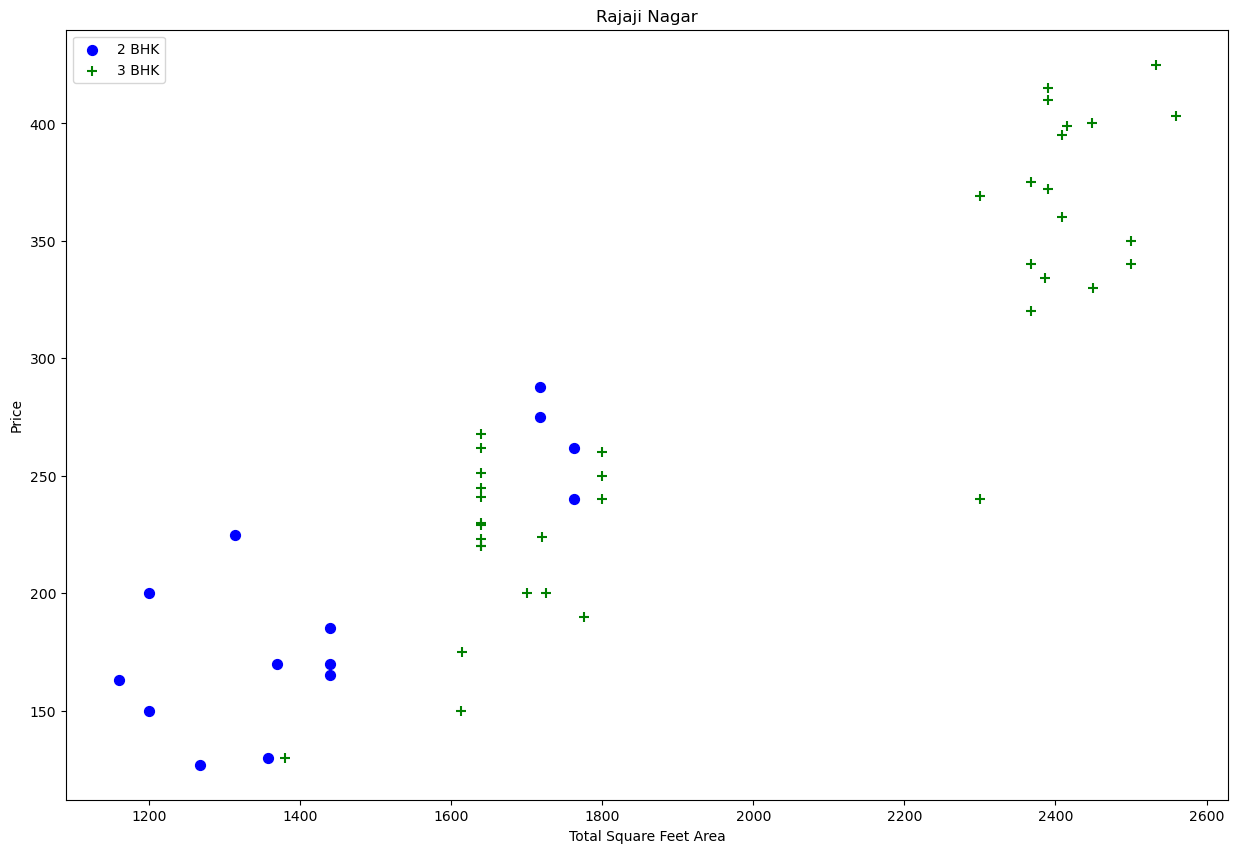

In [325]:
def plot_scatter_chart(dfin,location):
    bhk2=dfin[(dfin.location==location) & (dfin.bhk==2)]
    bhk3=dfin[(dfin.location==location) & (dfin.bhk==3)]
    
    matplotlib.rcParams['figure.figsize']=(15,10)
    
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

In [326]:
# function to remove bhk outliers
def remove_bhk_outliers(dfin):
    exclude_indices=np.array([])
    for location, location_df in dfin.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]            
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return dfin.drop(exclude_indices,axis='index')

df8=remove_bhk_outliers(df7)
df8.shape

(7329, 8)

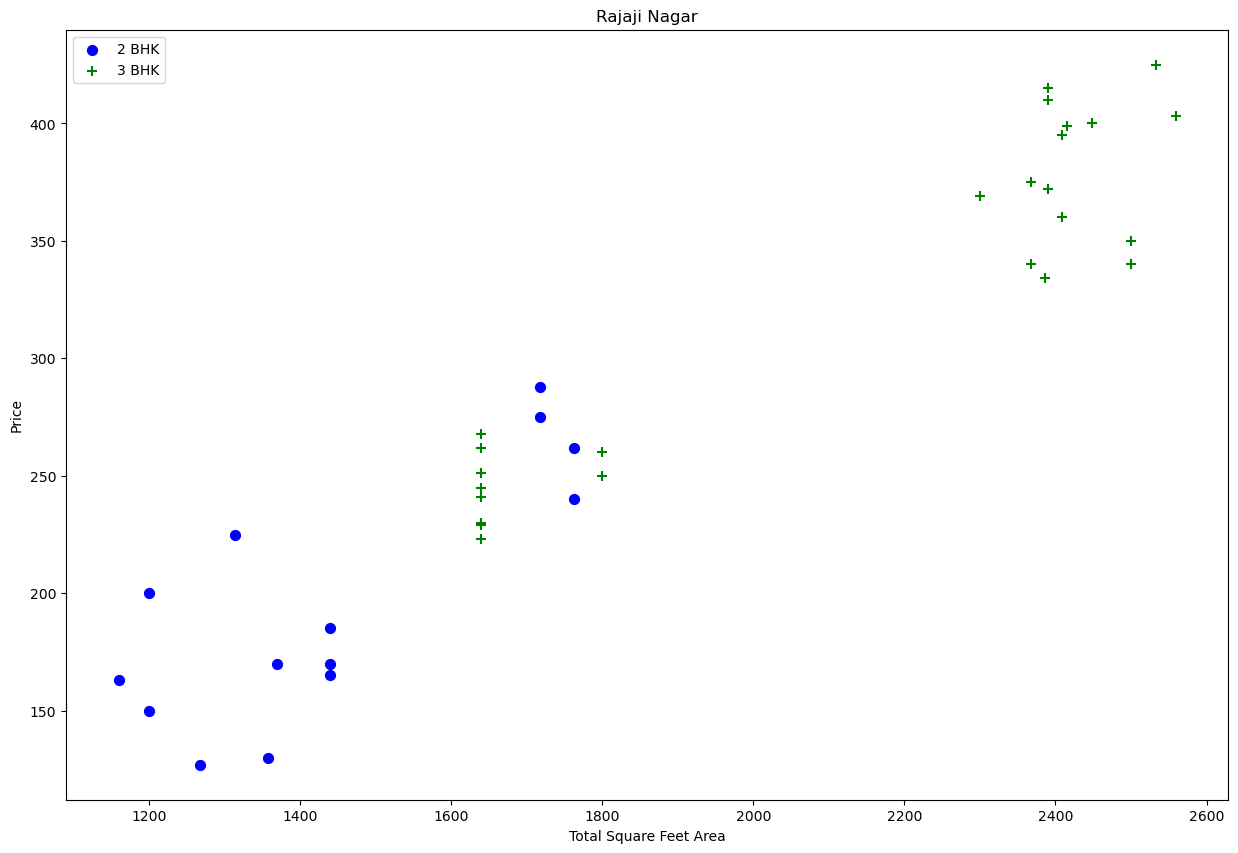

In [327]:
plot_scatter_chart(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

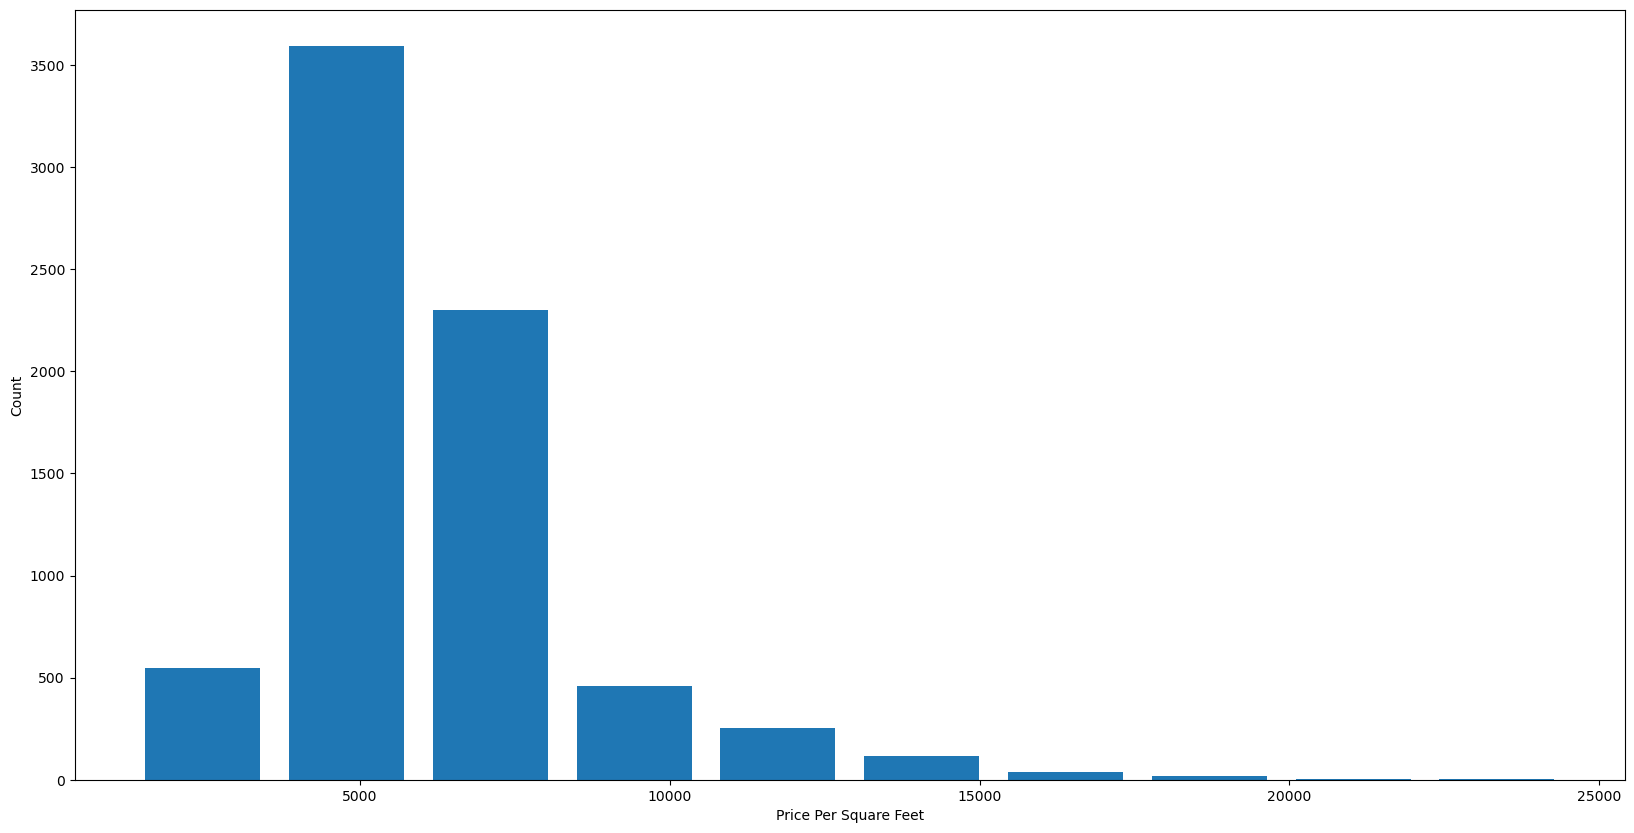

In [328]:
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [329]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [330]:
df8[df8.bath>10]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Super built-up Area,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,Super built-up Area,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,Super built-up Area,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,Super built-up Area,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,Super built-up Area,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

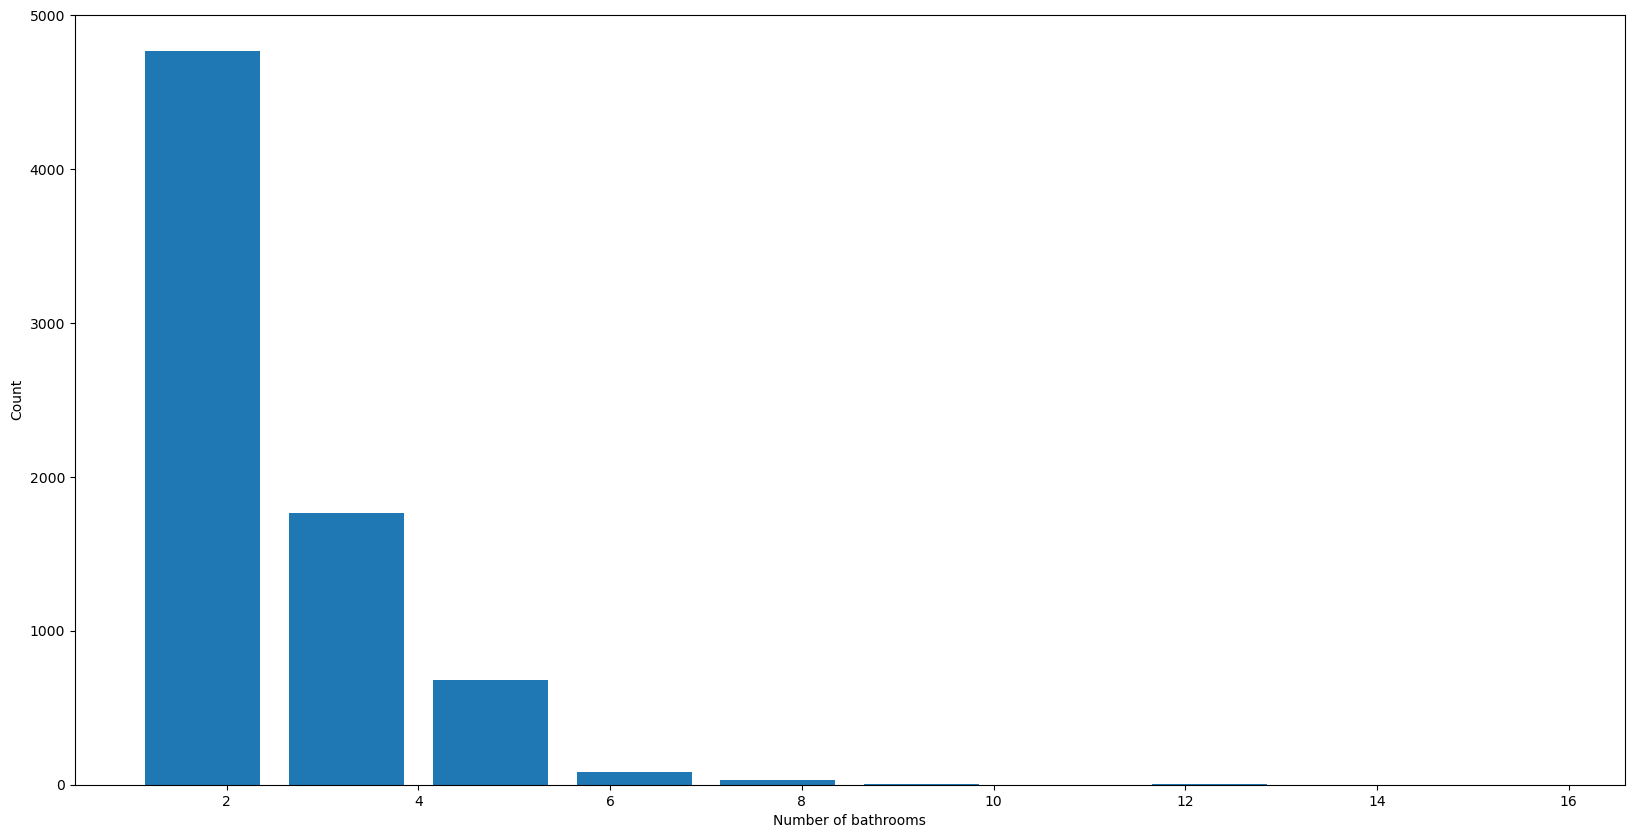

In [331]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [332]:
# checking if number of bath is more than number of bhk
df8[df8.bath>df8.bhk+2]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Built-up Area,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,Super built-up Area,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [333]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 8)

In [334]:
df10=df9.drop(['area_type','size','price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


# converting categorical value to numerical value

In [335]:
dummies=pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [336]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [337]:
df12=df11.drop(['location'],axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [338]:
df12.shape

(7251, 245)

In [339]:
#since 'price' is the dependent variable, it is dropped
X=df12.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [340]:
y=df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [341]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

# Linear Regression

In [342]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
lr.score(X_test,y_test)

0.845227769787429

In [343]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [344]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print("R2 score: ",(r2_score(y_test,y_pred)*100),"%")
print("Mean squared error: ",(mean_squared_error(y_test,y_pred)))
print("Root Mean squared error",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("Mean Absolute error: ",(mean_absolute_error(y_test,y_pred)))

R2 score:  84.5227769787429 %
Mean squared error:  783.265993525025
Root Mean squared error 27.986889672220187
Mean Absolute error:  16.5948979941577


# Lasso

In [345]:
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(X_train,y_train)
y_pred=ls.predict(X_test)
ls.score(X_test,y_test)

0.7237775279429011

In [346]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(Lasso(),X,y,cv=cv)

array([0.6846968 , 0.68991129, 0.70381598, 0.64870183, 0.71001741])

In [347]:
print("R2 score: ",(r2_score(y_test,y_pred)*100),"%")
print("Mean squared error: ",(mean_squared_error(y_test,y_pred)))
print("Root Mean squared error",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("Mean Absolute error: ",(mean_absolute_error(y_test,y_pred)))

R2 score:  72.3777527942901 %
Mean squared error:  1397.897211357552
Root Mean squared error 37.388463613226364
Mean Absolute error:  22.17925113765171


# Decision Tree Regressor

In [348]:
from sklearn.tree import DecisionTreeRegressor
dcr=DecisionTreeRegressor(random_state=0)
dcr.fit(X_train,y_train)
y_pred=dcr.predict(X_test)
dcr.score(X_test,y_test)

0.7091691453787197

In [349]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(DecisionTreeRegressor(random_state=0),X,y,cv=cv)

array([0.72894424, 0.60356889, 0.79570211, 0.68929621, 0.81174075])

In [350]:
print("R2 score: ",(r2_score(y_test,y_pred)*100),"%")
print("Mean squared error: ",(mean_squared_error(y_test,y_pred)))
print("Root Mean squared error",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("Mean Absolute error: ",(mean_absolute_error(y_test,y_pred)))

R2 score:  70.91691453787196 %
Mean squared error:  1471.826812728624
Root Mean squared error 38.36439511746046
Mean Absolute error:  20.024671558880232


# Price Prediction

In [351]:
df12.columns

Index(['total_sqft', 'bath', 'price', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=245)

In [352]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    # linear regression has more accuracy, hence using that    
    return lr.predict([x])[0]

In [353]:
predict_price('1st Phase JP Nagar',1000,2,2)

D:\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677172415

In [354]:
predict_price('1st Phase JP Nagar',1000,2,3)

D:\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.72616900747835

In [355]:
predict_price('Yelenahalli',1000,2,3)

D:\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


26.49372201048949

In [356]:
predict_price('Indira Nagar',1000,2,3)

D:\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


179.5052770758238

In [357]:
predict_price('Indira Nagar',1000,3,3)

D:\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.58430202033549